## Análise de Dados com Regressão Linear
### Importação de Bibliotecas

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # KNN
import joblib
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


import seaborn as sns # Retirar outliers
import matplotlib.pyplot as plt



## Carregamento dos Dados

In [3]:
file_path = Path('..') / 'data' / 'raw' / 'Steel_industry_data.csv'
df = pd.read_csv(file_path, index_col=False, encoding='utf-8', delimiter=',')

## Identificação de Colunas não numéricas e exclusão das mesmas

In [4]:
df_subset = df.copy() 
non_numeric_columns = df_subset.select_dtypes(exclude=['float64', 'int64']).columns

df_numeric_subset = df_subset.drop(columns=non_numeric_columns)

## Matriz de Correlação

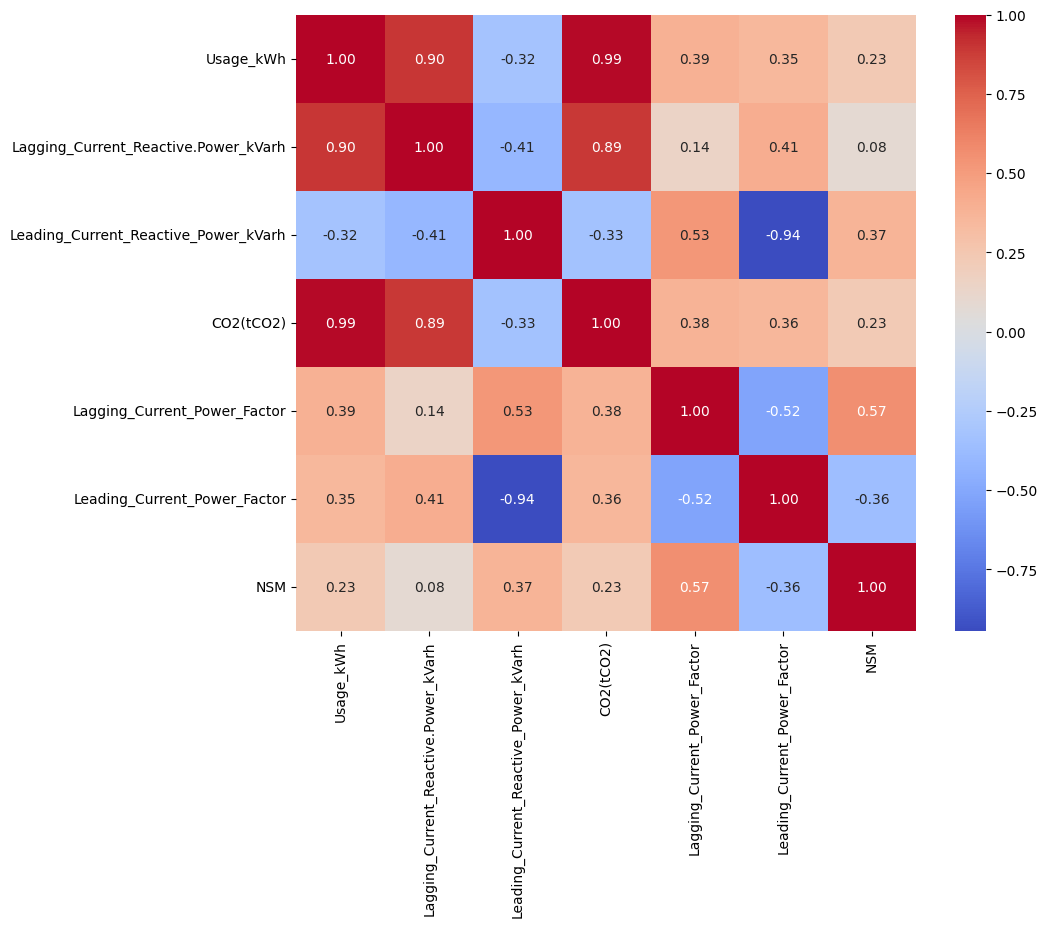

In [5]:
# Verificar correlações entre as variáveis numéricas
correlation_matrix = df_numeric_subset.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

 ## Calculo estatísticas descritivas

In [6]:
desc_stats = df['Usage_kWh'].describe()
print(desc_stats)
desc_stats = df['Lagging_Current_Reactive.Power_kVarh'].describe()
print(desc_stats)
desc_stats = df['Leading_Current_Reactive_Power_kVarh'].describe()
print(desc_stats)

count    35040.000000
mean        27.386892
std         33.444380
min          0.000000
25%          3.200000
50%          4.570000
75%         51.237500
max        157.180000
Name: Usage_kWh, dtype: float64
count    35040.000000
mean        13.035384
std         16.306000
min          0.000000
25%          2.300000
50%          5.000000
75%         22.640000
max         96.910000
Name: Lagging_Current_Reactive.Power_kVarh, dtype: float64
count    35040.000000
mean         3.870949
std          7.424463
min          0.000000
25%          0.000000
50%          0.000000
75%          2.090000
max         27.760000
Name: Leading_Current_Reactive_Power_kVarh, dtype: float64


In [7]:
desc_stats = df['CO2(tCO2)'].describe()
print(desc_stats)
desc_stats = df['Lagging_Current_Power_Factor'].describe()
print(desc_stats)

count    35040.000000
mean         0.011524
std          0.016151
min          0.000000
25%          0.000000
50%          0.000000
75%          0.020000
max          0.070000
Name: CO2(tCO2), dtype: float64
count    35040.000000
mean        80.578056
std         18.921322
min          0.000000
25%         63.320000
50%         87.960000
75%         99.022500
max        100.000000
Name: Lagging_Current_Power_Factor, dtype: float64


# Otimizar o modelo, excluindo Outliers

<Axes: xlabel='Usage_kWh'>

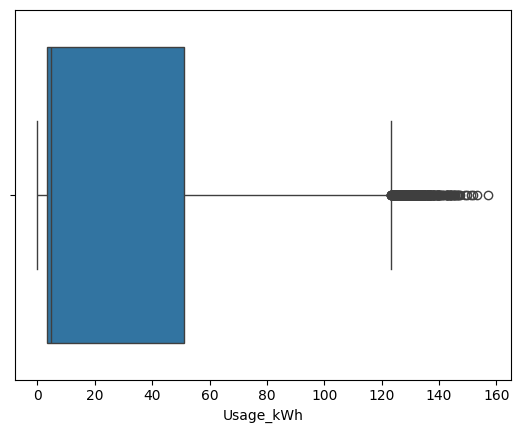

In [8]:
sns.boxplot(x=df['Usage_kWh'])

<Axes: xlabel='Usage_kWh'>

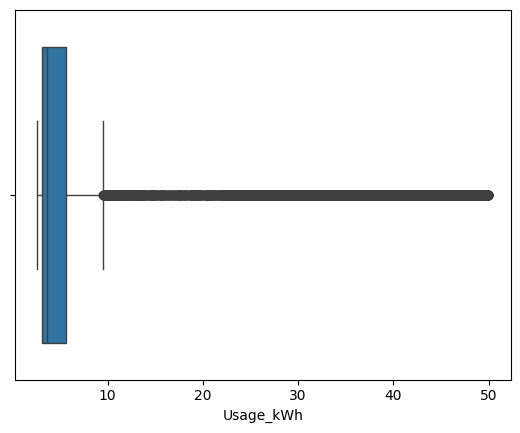

In [9]:
# Aplicar Filtro de correção
hi_filter = 50
hi_filter
lo_filter = df['Usage_kWh'].quantile(0.01)
lo_filter
df = df[(df['Usage_kWh'] > lo_filter) & (df['Usage_kWh'] < hi_filter)]
sns.boxplot(x=df['Usage_kWh'])

# Análise e Avaliação de Modelos de Regressão

In [10]:
# Selecionar variáveis independentes e dependentes
X = df[['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor']]
y = df['Usage_kWh']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
knn_model = KNeighborsRegressor(n_neighbors=5)
#svm_model = SVR(kernel='linear')


model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
#svm_model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
#y_pred_svm = svm_model.predict(X_test)


X_newData = pd.DataFrame({
    'Lagging_Current_Reactive.Power_kVarh': [13.035384],
    'Leading_Current_Reactive_Power_kVarh': [3.870949],
    'CO2(tCO2)': [0.011524],
    'Lagging_Current_Power_Factor': [80.578056],
})

predictions = model.predict(X_newData)
print(f'A previsão para kWh é de aproximadamente: {predictions[0]:.2f} kWh')


# Fazer previsões nos dados de teste
y_pred_test = model.predict(X_test)

# Avaliar o desempenho do modelo nos dados de teste
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error nos dados de teste: {mse_test}')
print(f'Mean Absolute Error nos dados de teste: {mae_test}')
print(f'R-squared nos dados de teste: {r2_test}')

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'Mean Squared Error do modelo KNN nos dados de teste: {mse_knn}')
print(f'Mean Absolute Error do modelo KNN nos dados de teste: {mae_knn}')
print(f'R-squared do modelo KNN nos dados de teste: {r2_knn}')

# Avaliar o desempenho do modelo SVM nos dados de teste
#mse_svm = mean_squared_error(y_test, y_pred_svm)
#mae_svm = mean_absolute_error(y_test, y_pred_svm)
#r2_svm = r2_score(y_test, y_pred_svm)

#print(f'Mean Squared Error do modelo SVM nos dados de teste: {mse_svm}')
#print(f'Mean Absolute Error do modelo SVM nos dados de teste: {mae_svm}')
#print(f'R-squared do modelo SVM nos dados de teste: {r2_svm}')


A previsão para kWh é de aproximadamente: 26.17 kWh
Mean Squared Error nos dados de teste: 6.6096326028537025
Mean Absolute Error nos dados de teste: 1.5318364119588068
R-squared nos dados de teste: 0.9651496042493151
Mean Squared Error do modelo KNN nos dados de teste: 8.795251269866247
Mean Absolute Error do modelo KNN nos dados de teste: 0.9256333595594021
R-squared do modelo KNN nos dados de teste: 0.9536255634921048


In [11]:
param_grid = {
    'fit_intercept': [True, False],
}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X, y)

y_pred_grid = grid_search.predict(X_test)

mse_grid = mean_squared_error(y_test, y_pred_grid)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_grid = r2_score(y_test, y_pred_grid)

print(f'Mean Squared Error nos dados de teste: {mse_grid}')
print(f'Mean Absolute Error nos dados de teste: {mae_test}')
print(f'R-squared nos dados de teste: {r2_grid}')

Mean Squared Error nos dados de teste: 6.60587903427974
Mean Absolute Error nos dados de teste: 1.5318364119588068
R-squared nos dados de teste: 0.9651693955687635


# Gráficos de resíduos Regressão Linear

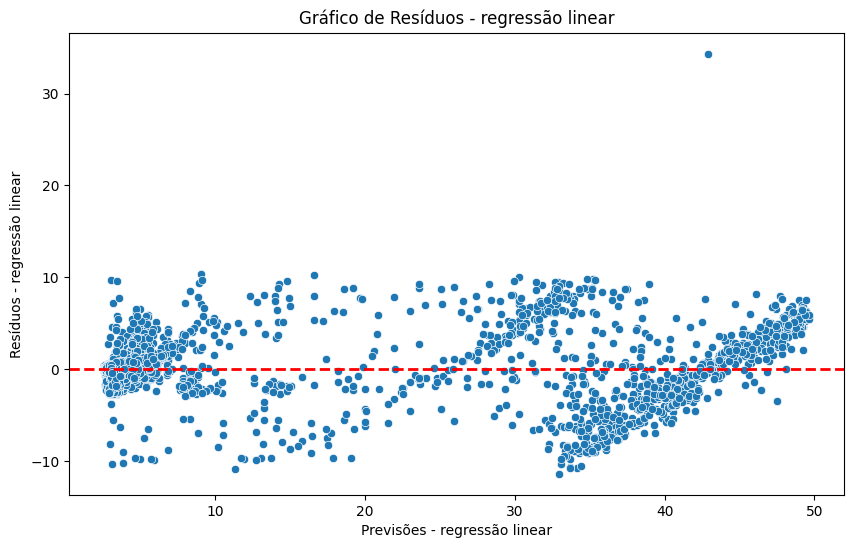

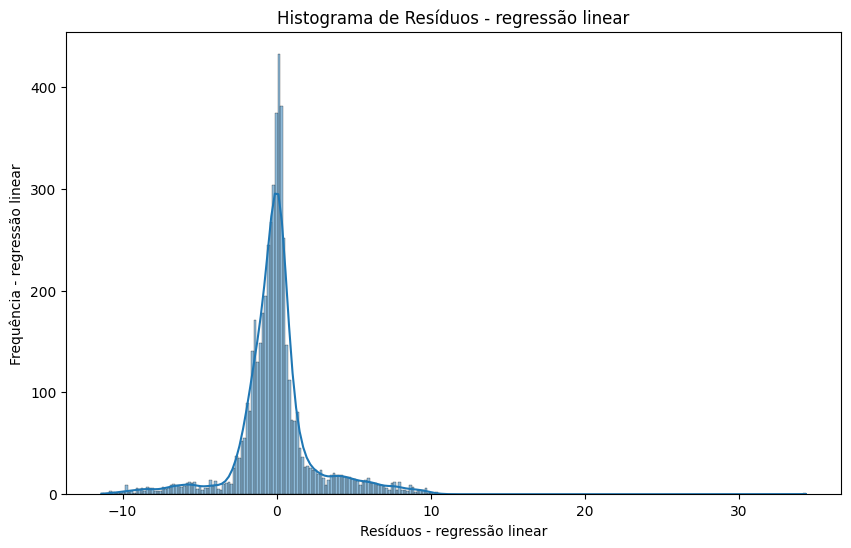

In [12]:
# Calcular os resíduos do modelo de regressão linear
residuals = y_test - y_pred_test

# Plotar gráfico de resíduos do modelo de regressão linear
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_knn, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Gráfico de Resíduos - regressão linear')
plt.xlabel('Previsões - regressão linear')
plt.ylabel('Resíduos - regressão linear')
plt.show()

# Plotar histograma de resíduos do modelo regressão linear
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histograma de Resíduos - regressão linear')
plt.xlabel('Resíduos - regressão linear')
plt.ylabel('Frequência - regressão linear')
plt.show()

# Gráficos de resíduos SVM

In [13]:
# Calcular os resíduos do modelo de SVM
residuals_SVM = y_test - y_pred_svm

# Plotar gráfico de resíduos do modelo de SVM
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_svm, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Gráfico de Resíduos - SVM')
plt.xlabel('Previsões - SVM')
plt.ylabel('Resíduos - SVM')
plt.show()

# Plotar histograma de resíduos do modelo SVM
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histograma de Resíduos - SVM')
plt.xlabel('Resíduos - SVM')
plt.ylabel('Frequência - SVM')
plt.show()

NameError: name 'y_pred_svm' is not defined

# Gráficos de resíduos KNN

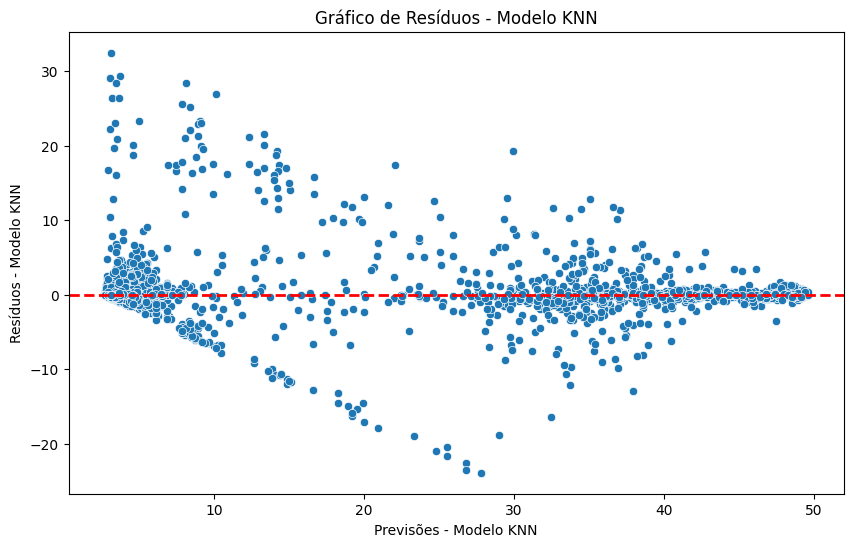

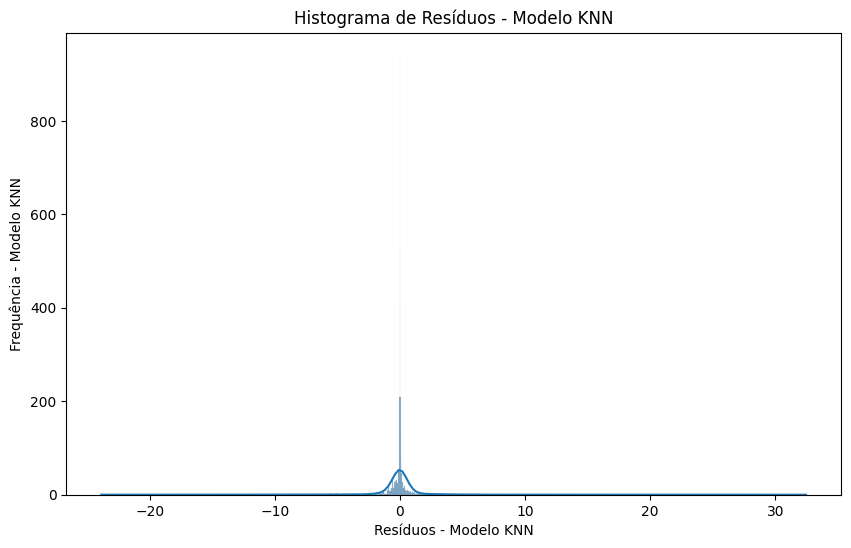

In [ ]:
# Calcular os resíduos do modelo KNN
residuals_knn = y_test - y_pred_knn

# Plotar gráfico de resíduos do modelo KNN
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_knn, y=residuals_knn)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Gráfico de Resíduos - Modelo KNN')
plt.xlabel('Previsões - Modelo KNN')
plt.ylabel('Resíduos - Modelo KNN')
plt.show()

# Plotar histograma de resíduos do modelo KNN
plt.figure(figsize=(10, 6))
sns.histplot(residuals_knn, kde=True)
plt.title('Histograma de Resíduos - Modelo KNN')
plt.xlabel('Resíduos - Modelo KNN')
plt.ylabel('Frequência - Modelo KNN')
plt.show()



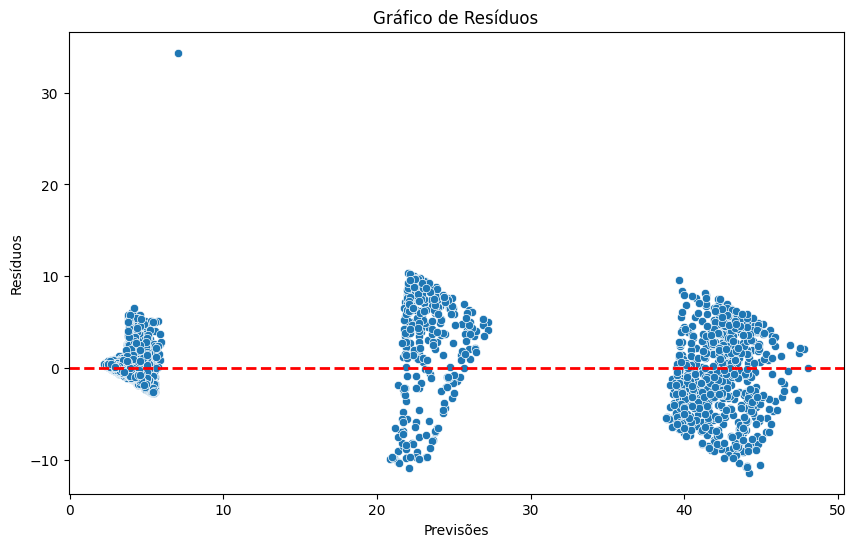

In [ ]:
# Calcular os resíduos
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Gráfico de Resíduos')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

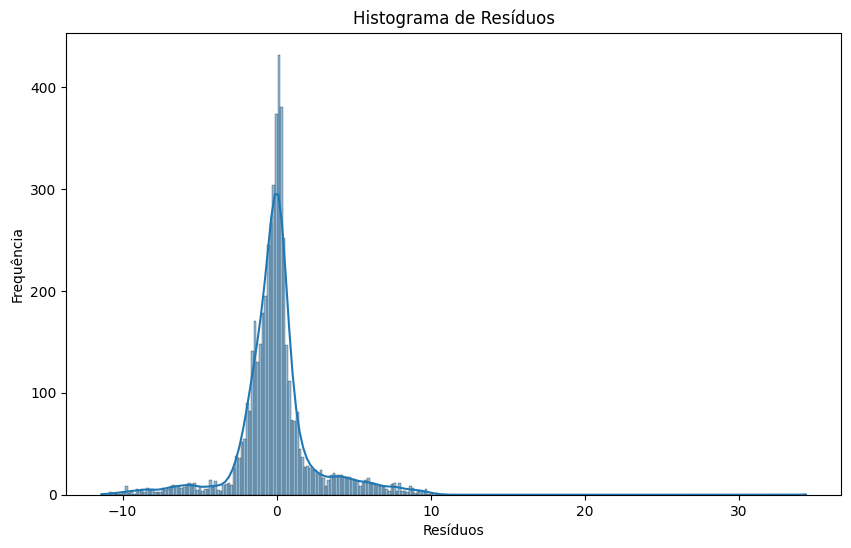

In [ ]:
# Plotar histograma de resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histograma de Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

In [17]:

X = df[['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor']]
y = df['Usage_kWh']

model_final = KNeighborsRegressor(n_neighbors=5)
model_final.fit(X, y)

y_pred = model_final.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')


joblib.dump(model_final, 'modelo_final_knn.pkl')




MAE: 0.7106003147128246
MSE: 4.981263645948073
R²: 0.9737354525083832


['modelo_final_knn.pkl']